## **Prediction Using Supervised Machine Learning**

**Simple Linear Regression**

We will use  Python Scikit-Learn library for machine learning that is used to implement regression functions.In this notebook We will be implementing  simple linear regression involving two variables.
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. 


In [57]:
#Importing all libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score
%matplotlib inline

import warnings
warnings.filterwarnings(action="ignore")


**Importing Datasets**

In [3]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")
data.sample(5)

Data imported successfully


,Hours,Scores
20,2.7,30
24,7.8,86
11,5.9,62
6,9.2,88
1,5.1,47


**Plotting a 2-D graph btwn the two variables (Hours and Scores)**

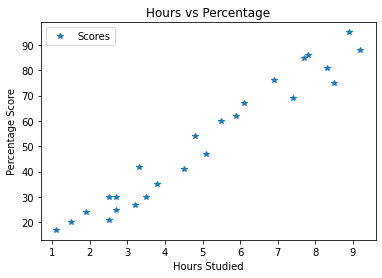

In [4]:
data.plot(x="Hours",y="Scores", style="*")
plt.title("Hours vs Percentage")
plt.ylabel("Percentage Score")
plt.xlabel("Hours Studied")
plt.show()

**From the graph above, it is clearly visible  that there is a positive linear relation between the number of hours studied and percentage of score.**

**Data Preperation**

In [44]:
x=data[['Hours']].values
y=data["Scores"].values

**Splitting our dataset into training and testing sets using train test split.**

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=0)
print(f"Training datasets are:{x_train.shape[0]}")
print(f"Testing datasets are:{x_test.shape[0]}")

Training datasets are:17
Testing datasets are:8


**Model Training**

In [49]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
yhat=lr.predict(x_test)
print(f"Coefficients:{lr.coef_}")
print(f"Intercept:{lr.intercept_}")

Coefficients:[9.78856669]
Intercept:2.3708153823418883


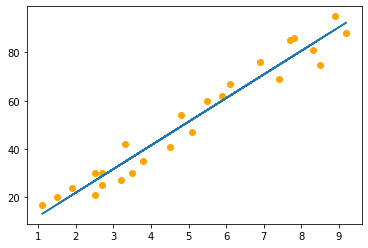

In [47]:
# Plotting the regression line
line = lr.coef_*x + lr.intercept_

# Plotting for the test data
plt.scatter(x, y, color="orange")
plt.plot(x, line);
plt.show()

**Model Evaluation**

In [64]:
df=pd.DataFrame({'Actual':y_test, 'Predicted': yhat})
df.head(5)

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359


**prediction of an Unknown Case**

In [63]:
hours = [[9.25]]
p_score = lr.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(p_score[0]))

No of Hours = [[9.25]]
Predicted Score = 92.91505723477056


**Data Evaluation**

In [59]:
# Evaluate the model using the test data
yhat = lr.predict(x_test)
mse = mean_squared_error(y_test, yhat)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, yhat)
print("R2:", r2)

MSE: 22.965097212700428
RMSE: 4.7921912746363144
R2: 0.9568211104435257


Mean Square Error (MSE): The mean of the squared differences between 
predicted and actual values. This yields a relative metric in which the smaller the value, the better the fit of the model.

Root Mean Square Error (RMSE): The square root of the MSE. This yields an absolute metric in the same unit as the label. The smaller the value, the better the model.


Coefficient of Determination (usually known as R-squared or R2): A relative metric in which the higher the value, the better the fit of the model. In essence, this metric represents how much of the variance between predicted and actual label values the model is able to explain.